In [96]:
import json
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
%config NotebookApp.iopub_msg_rate_limit=10000
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [2]:
#CODE USED TO MAKE 'genreAndArtistFrequencies.csv'

# with open('mpd.slice.0-999.json', 'r') as json_file:
#     playlistData = json.load(json_file)
# with open('songs_0-999.json', 'r') as json_file:
#     songData = json.load(json_file)
# with open('artists_0-999.json', 'r') as json_file:
#     artistData = json.load(json_file)
# with open('albums_0-999.json', 'r') as json_file:
#     albumData = json.load(json_file)

# def findGenresAndArtist(track):
#     artist = track['artist_uri']
#     artist = artist.split(':')[2]
#     if artist in artistData:
#         genres = artistData[artist]['genres']
#     else:
#         genres = []
#     return genres, artist

# def findModes(lst, n):
#     counter = Counter(lst)
#     modes = counter.most_common(n)
#     return [mode[0] for mode in modes]

# def getPlaylistArtists(playlist, modes):
#     allArtists = []
#     for track in playlist['tracks']:
#         artist = track['artist_uri']
#         artist = artist.split(':')[2]
#         allArtists.append(artist)
#     topArtists = findModes(allArtists, modes)
#     return topArtists, allArtists
    
# def getPlaylistGenres(playlist, modes):
#     allGenres = []
#     for track in playlist['tracks']:
#         genres, a = findGenresAndArtist(track)
#         for g in genres:
#             allGenres.append(g)
#     topGenres = findModes(allGenres, modes)
#     return topGenres, allGenres

# allGenres = []
# allDifGenres = []
# allArtists = []
# allDifArtists = []
# for playlist in playlistData['playlists']:
#     for track in playlist['tracks']:
#         genres, artist = findGenresAndArtist(track)
#         for g in genres:
#             allGenres.append(g)
#             if not g in allDifGenres:
#                 allDifGenres.append(g)
#         allArtists.append(artist)
#         if not artist in allDifArtists:
#             allDifArtists.append(artist)

# def getFrequency(allList, obj):
#     count = 0
#     for x in allList:
#         if x == obj:
#             count += 1
#     frequency = round(count/len(allList), 5)
#     return frequency

# allPlaylistInfo = pd.DataFrame()
# counter = 1
# for playlist in playlistData['playlists']:
#     genres, x = getPlaylistGenres(playlist, 2)
#     gfs = []
#     for g in genres:
#         f = getFrequency(allGenres, g)
#         gfs.append(f)
#     artists, x = getPlaylistArtists(playlist, 2)
#     afs = []
#     for a in artists:
#         f = getFrequency(allArtists, a)
#         afs.append(f)
#     row = pd.DataFrame({'playlist': [playlist['pid']],
#            'genres': [genres],
#            'genreFrequencies_sum':[sum(gfs)],
#            'artists': [artists],
#            'artistFrequencies_sum':[sum(afs)]})
#     allPlaylistInfo = pd.concat([allPlaylistInfo, row], ignore_index=True).reset_index(drop=True)
#     percentDone = round((counter/len(playlistData['playlists'])*100),2)
#     clear_output(wait=True)
#     time.sleep(0.001)
#     print(str(percentDone) + "% done")
#     counter += 1

In [3]:
allPlaylistInfo = pd.read_csv('genreAndArtistFrequencies.csv')

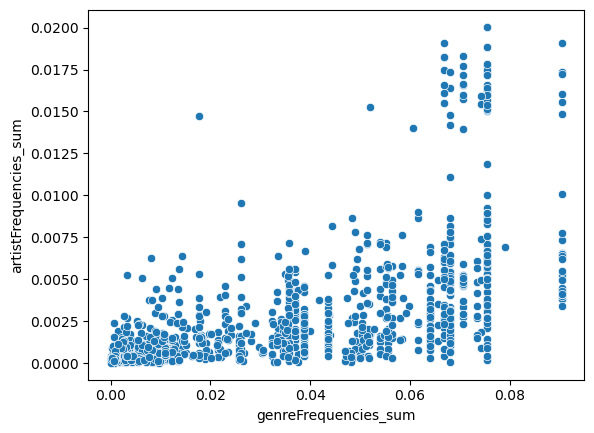

In [4]:
sns.scatterplot(data=allPlaylistInfo, x='genreFrequencies_sum', y='artistFrequencies_sum')
plt.show()

In [5]:
allPlaylistInfo.head()

,playlist,genres,genreFrequencies_sum,artists,artistFrequencies_sum
0,0,"['pop', 'dance pop']",0.06800,"['2Hjj68yyUPiC0HKEOigcEp', '7bXgB6jMjp9ATFy66e...",0.00418
1,1,"['rock', 'album rock']",0.03561,"['2Hkut4rAAyrQxRdof7FVJq', '7zdmbPudNX4SQJXnYI...",0.00026
2,2,"['k-pop', 'k-pop boy group']",0.00109,"['3Nrfpe0tUJi4K4DXYWgMUX', '4XDi67ZENZcbfKnvMn...",0.00072
3,3,"['indie rock', 'noise pop']",0.00778,"['5juac7bFYyLKmV0VGSyaKM', '2JSc53B5cQ31m0xTB7...",0.00020
4,4,"['pop rock', 'permanent wave']",0.01427,"['40Yq4vzPs9VNUrIBG5Jr2i', '2DaxqgrOhkeH0fpeiQ...",0.00099


In [126]:
def miniBatchKMeans(df, k):
    batch_size = 5120
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=700)
    clusters = minibatch_kmeans.fit_predict(df)
    labels = minibatch_kmeans.fit_predict(df)
    return clusters, labels

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Prog

<AxesSubplot:>

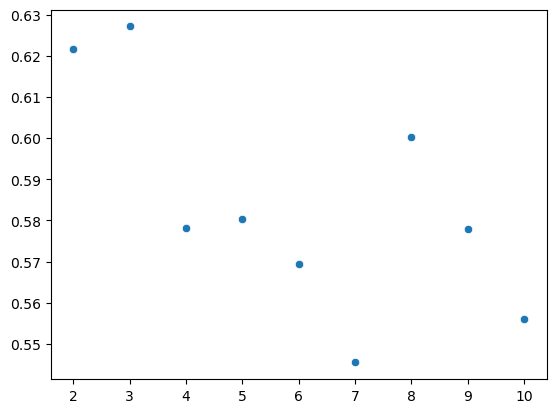

In [127]:
kMeansX = allPlaylistInfo[['genreFrequencies_sum', 'artistFrequencies_sum']]

cluster_range = range(2, 11)

silhouette_scores = {}

for num_clusters in cluster_range:
    clusters, labels = miniBatchKMeans(kMeansX, num_clusters)
    silhouette_scores[num_clusters] = silhouette_score(kMeansX, labels)

sns.scatterplot(x=silhouette_scores.keys(), y=silhouette_scores.values())

In [137]:
clusters, labels = miniBatchKMeans(kMeansX, 3)
kMeansClusters = allPlaylistInfo.copy()
kMeansClusters['cluster'] = clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [138]:
kMeansClusters.head()

,playlist,genres,genreFrequencies_sum,artists,artistFrequencies_sum,cluster
0,0,"['pop', 'dance pop']",0.06800,"['2Hjj68yyUPiC0HKEOigcEp', '7bXgB6jMjp9ATFy66e...",0.00418,0
1,1,"['rock', 'album rock']",0.03561,"['2Hkut4rAAyrQxRdof7FVJq', '7zdmbPudNX4SQJXnYI...",0.00026,2
2,2,"['k-pop', 'k-pop boy group']",0.00109,"['3Nrfpe0tUJi4K4DXYWgMUX', '4XDi67ZENZcbfKnvMn...",0.00072,1
3,3,"['indie rock', 'noise pop']",0.00778,"['5juac7bFYyLKmV0VGSyaKM', '2JSc53B5cQ31m0xTB7...",0.00020,1
4,4,"['pop rock', 'permanent wave']",0.01427,"['40Yq4vzPs9VNUrIBG5Jr2i', '2DaxqgrOhkeH0fpeiQ...",0.00099,1


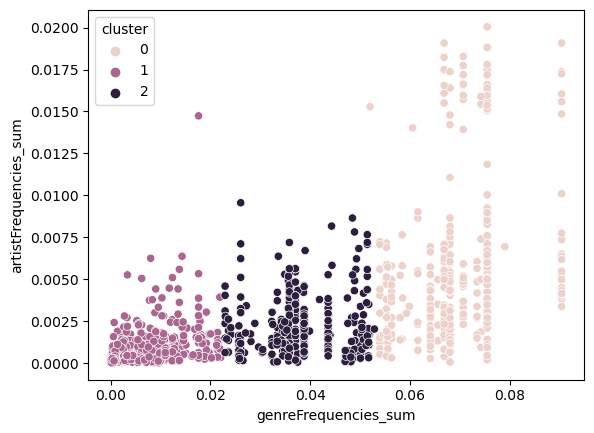

In [139]:
sns.scatterplot(data=kMeansClusters, x='genreFrequencies_sum', y='artistFrequencies_sum', hue='cluster')
plt.show()

In [76]:
def meanShift(df, bw):
    score = -5
    ms = MeanShift(bandwidth=bw)
    ms.fit(df)
    labels = ms.labels_
    if len(set(ms.labels_)) > 1:
        ss_avg = silhouette_score(df.values, labels)
        score = ss_avg
        
    return score, labels

In [167]:
meanShiftX = allPlaylistInfo[['genreFrequencies_sum', 'artistFrequencies_sum']]

bandMin = 0.009
bandMax = 0.011
bandStep = 0.0001
currentBand = bandMin
scores = {}
while currentBand <= (bandMax+(bandStep/2)):
    score, labels = meanShift(meanShiftX, currentBand)
    scores[currentBand] = score
    percentDone = round(((currentBand-bandMin)/bandStep)/((bandMax-bandMin)/bandStep)*100,2)
    clear_output(wait=True)
    time.sleep(0.001)
    print(str(currentBand) + ', ' + str(score) + ', ' + str(percentDone) + "% done")
    currentBand = round(currentBand + bandStep, 6)

0.011, 0.5939417902265607, 100.0% done


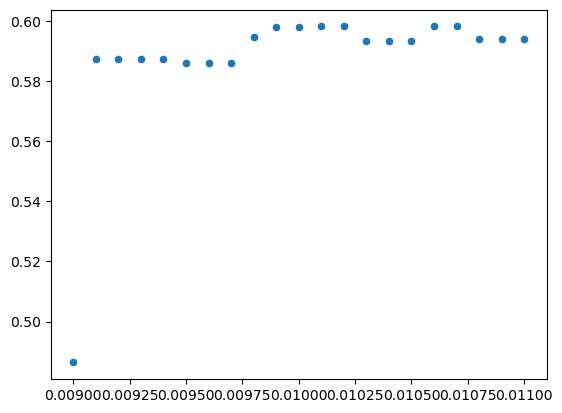

In [168]:
sns.scatterplot(x=scores.keys(), y=scores.values()) #0.031 is the optimal bandwidth
plt.show()

In [169]:
scores

{0.009: 0.48640842457993405,
 0.0091: 0.5874300294525854,
 0.0092: 0.5874300294525854,
 0.0093: 0.5874300294525854,
 0.0094: 0.5874300294525854,
 0.0095: 0.5857969437227941,
 0.0096: 0.5857969437227941,
 0.0097: 0.5857969437227941,
 0.0098: 0.5946790821297209,
 0.0099: 0.5978678526343607,
 0.01: 0.5978678526343607,
 0.0101: 0.5980796889779715,
 0.0102: 0.5980796889779715,
 0.0103: 0.593178328354272,
 0.0104: 0.593178328354272,
 0.0105: 0.593178328354272,
 0.0106: 0.5980796889779715,
 0.0107: 0.5980796889779715,
 0.0108: 0.5939417902265607,
 0.0109: 0.5939417902265607,
 0.011: 0.5939417902265607}

In [176]:
score, labels = meanShift(meanShiftX, .0105)
meanShiftClusters = allPlaylistInfo.copy()
meanShiftClusters['cluster'] = labels

In [177]:
meanShiftClusters.head()

,playlist,genres,genreFrequencies_sum,artists,artistFrequencies_sum,cluster
0,0,"['pop', 'dance pop']",0.06800,"['2Hjj68yyUPiC0HKEOigcEp', '7bXgB6jMjp9ATFy66e...",0.00418,1
1,1,"['rock', 'album rock']",0.03561,"['2Hkut4rAAyrQxRdof7FVJq', '7zdmbPudNX4SQJXnYI...",0.00026,3
2,2,"['k-pop', 'k-pop boy group']",0.00109,"['3Nrfpe0tUJi4K4DXYWgMUX', '4XDi67ZENZcbfKnvMn...",0.00072,0
3,3,"['indie rock', 'noise pop']",0.00778,"['5juac7bFYyLKmV0VGSyaKM', '2JSc53B5cQ31m0xTB7...",0.00020,0
4,4,"['pop rock', 'permanent wave']",0.01427,"['40Yq4vzPs9VNUrIBG5Jr2i', '2DaxqgrOhkeH0fpeiQ...",0.00099,0


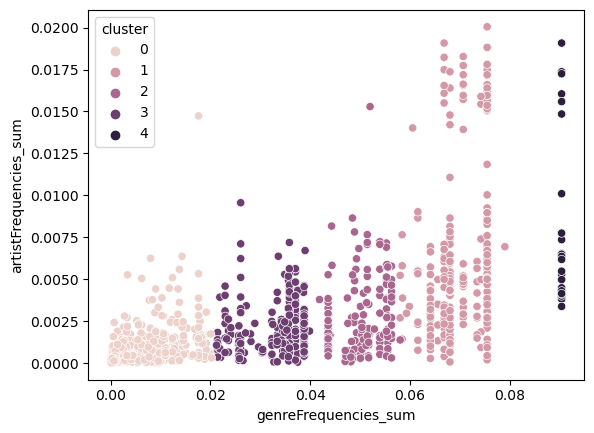

In [178]:
sns.scatterplot(data=meanShiftClusters, x='genreFrequencies_sum', y='artistFrequencies_sum', hue='cluster')
plt.show()

In [92]:
def hierCluster(df, clusters):
    agg = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
    agg = agg.fit(df)
    ss_avg = silhouette_score(df, agg.labels_)
    return ss_avg, agg.labels_

In [100]:
hierX = allPlaylistInfo[['genreFrequencies_sum', 'artistFrequencies_sum']]

scores = {}
clusters = len(hierX)
for i in range(2, clusters):
    score, labels = hierCluster(hierX, i)
    scores[i] = score
    percentDone = round(((i-1)/(clusters-2))*100,2)
    clear_output(wait=True)
    time.sleep(0.001)
    print(str(percentDone) + "% done")

100.0% done


7


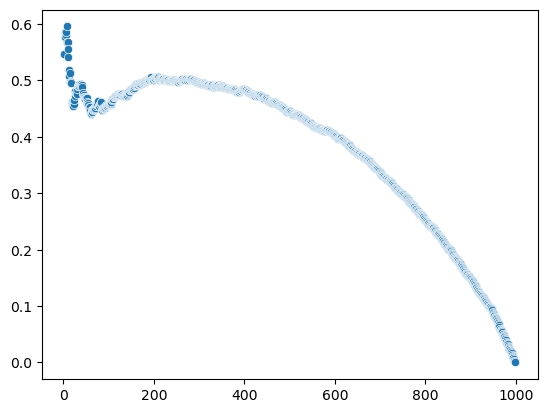

In [102]:
sns.scatterplot(x=scores.keys(), y=scores.values()) #30 is the optimal number of clusters
bestClusters = max(scores, key=scores.get)
print(bestClusters)

In [103]:
score, labels = hierCluster(hierX, bestClusters)
hierClusters = allPlaylistInfo.copy()
hierClusters['cluster'] = labels

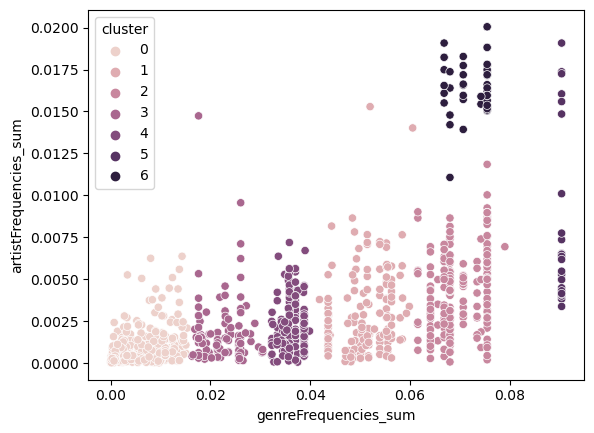

In [104]:
sns.scatterplot(data=hierClusters, x='genreFrequencies_sum', y='artistFrequencies_sum', hue='cluster')
plt.show()